# Energetic Ion Spectrometer (EIS)
author: Louis Richard

In [1]:
import matplotlib.pyplot as plt

from pyrfu import mms, pyrf
from pyrfu.plot import plot_line, plot_spectr

Load IGRF coefficients ...


## Define path to data, time interval and spacecraft index

In [2]:
mms.db_init("/Volumes/mms")
tint_long = ["2017-07-23T16:10:00", "2017-07-23T18:10:00"]
mms_id = 2

## Load data

### Magnetic field in GSE coordinates

In [3]:
# Single spacecraft
b_gse = mms.get_data("b_gse_fgm_srvy_l2", tint_long, mms_id)

21-Apr-23 18:43:44: Loading mms2_fgm_b_gse_srvy_l2...


### Single spacecraft H$^+$ (PHxTOF and ExTOF), He$^{n+}$ (ExTOF), O$^{n+}$ (ExTOF) and electrons differential particle fluxes for all 6 telescopes.

In [4]:
# Proton
dpf_phxtof_allt_proton = mms.get_eis_allt("flux_phxtof_proton_srvy_l2", tint_long, mms_id)
dpf_extof_allt_proton = mms.get_eis_allt("flux_extof_proton_srvy_l2", tint_long, mms_id)
# Oxygen
dpf_extof_allt_oxygen = mms.get_eis_allt("flux_extof_oxygen_srvy_l2", tint_long, mms_id)
# Helium
dpf_extof_allt_helium = mms.get_eis_allt("flux_extof_alpha_srvy_l2", tint_long, mms_id)
# Electron
dpf_een_allt_electron = mms.get_eis_allt("flux_electronenergy_electron_srvy_l2", tint_long, mms_id)

21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_spin...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_sector...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_t0_energy_dminus...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_t0_energy_dplus...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t0...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_look_t0...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t1...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_look_t1...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t2...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_look_t2...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t3...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_look_t3...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t4...
21-Apr-23 18:43:45: Loading mms2_epd_eis_srvy_l2_phx

## Post-processing

### Compute H$^+$ combined PHxTOF and ExTOF differential particle flux for all 6 telescopes

In [5]:
dpf_eis_allt_proton = mms.eis_combine_proton_spec(dpf_phxtof_allt_proton, dpf_extof_allt_proton)

### Spin average H+, He𝑛+ (ExTOF) and O𝑛+ (ExTOF) differential particle fluxes for all 6 telescopes

In [6]:
# Helium
dpf_eis_allt_proton_spin = mms.eis_spin_avg(dpf_eis_allt_proton)

# Helium
dpf_extof_allt_helium_spin = mms.eis_spin_avg(dpf_extof_allt_helium)

# Oxygen
dpf_extof_allt_oxygen_spin = mms.eis_spin_avg(dpf_extof_allt_oxygen)

# Electron
dpf_een_allt_electron_spin = mms.eis_spin_avg(dpf_een_allt_electron)

### Compute H$^+$, He$^{n+}$ (ExTOF) and O$^{n+}$ (ExTOF) omni-directional differential particle fluxes with an without spin averaging

In [7]:
# Helium
dpf_eis_omni_proton = mms.eis_omni(dpf_eis_allt_proton)
dpf_eis_omni_proton_spin = mms.eis_omni(dpf_eis_allt_proton_spin)

# Helium
dpf_extof_omni_helium = mms.eis_omni(dpf_extof_allt_helium)
dpf_extof_omni_helium_spin = mms.eis_omni(dpf_extof_allt_helium_spin)

# Oxygen
dpf_extof_omni_oxygen = mms.eis_omni(dpf_extof_allt_oxygen)
dpf_extof_omni_oxygen_spin = mms.eis_omni(dpf_extof_allt_oxygen_spin)

# Electron
dpf_een_omni_electron = mms.eis_omni(dpf_een_allt_electron)
dpf_een_omni_electron_spin = mms.eis_omni(dpf_een_allt_electron_spin)

### Apply H$^+$ omni-directional differential particle flux cross calibration correction

In [8]:
dpf_eis_omni_proton_corr = mms.eis_proton_correction(dpf_eis_omni_proton)
dpf_eis_omni_proton_spin_corr = mms.eis_proton_correction(dpf_eis_omni_proton_spin)

### Plot in a MMS SDC Quicklook fashion

<IPython.core.display.Javascript object>


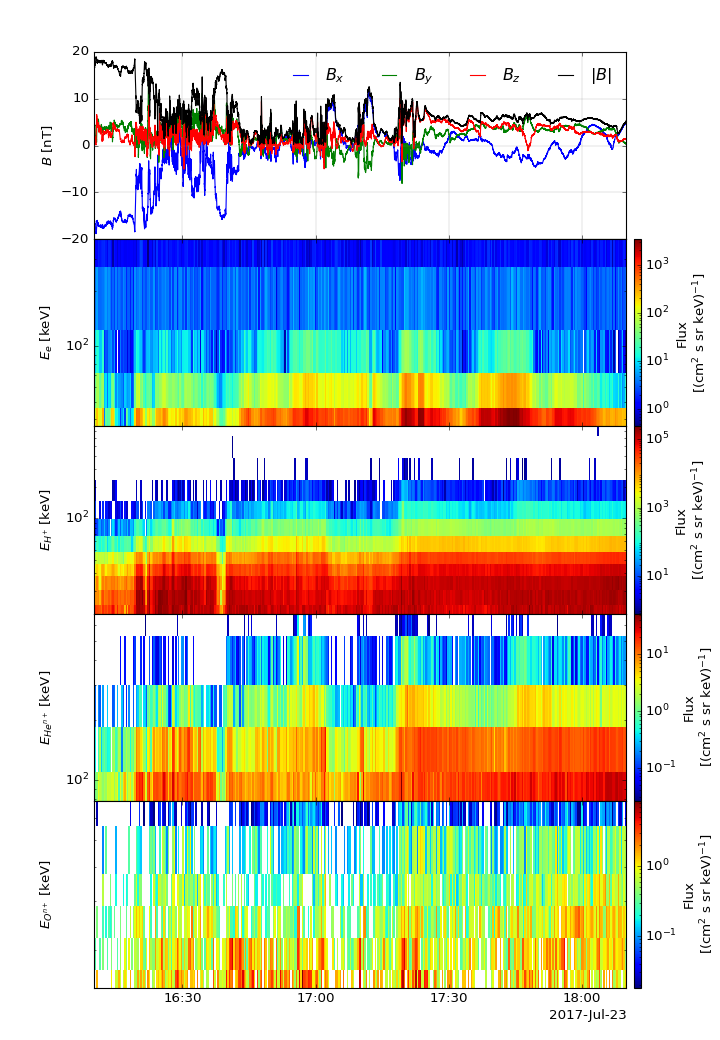

In [9]:
%matplotlib notebook
f, axs = plt.subplots(5, sharex="all", figsize=(9, 13))
f.subplots_adjust(bottom=.05, top=.95, left=.13, right=.87, hspace=0)

plot_line(axs[0], b_gse)
plot_line(axs[0], pyrf.norm(b_gse), color="k")
axs[0].legend(["$B_x$", "$B_y$", "$B_z$", "$|B|$"], frameon=False, handlelength=1.5, loc="upper right", ncol=4)
axs[0].set_ylabel("$B$ [nT]")
axs[0].set_ylim([-20, 20])

# Electron spin averaged
axs[1], caxs1 = plot_spectr(axs[1], dpf_een_omni_electron_spin, yscale="log", cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_{e}$ [keV]")

# Proton spin averaged
axs[2], caxs2 = plot_spectr(axs[2], dpf_eis_omni_proton_spin_corr, yscale="log", cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylabel("$E_{H^{+}}$ [keV]")

# Helium spin averaged
axs[3], caxs3 = plot_spectr(axs[3], dpf_extof_omni_helium_spin, yscale="log", cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylabel("$E_{He^{n+}}$ [keV]")

# Oxygen spin averaged
axs[4], caxs4 = plot_spectr(axs[4], dpf_extof_omni_oxygen_spin, yscale="log", cscale="log")
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_{O^{n+}}$ [keV]")

f.align_ylabels(axs)

### Compute H$^{+}$ (PHxTOF and ExTOF), He$^{n+}$, O$^{n+}$ and electron pitch angle distributions

In [10]:
# Low energy proton
dpf_phxtof_pad_proton = mms.eis_pad(dpf_phxtof_allt_proton, vec=b_gse, energy=[10, 50])

# High energy proton
dpf_extof_pad_proton = mms.eis_pad(dpf_extof_allt_proton, vec=b_gse)

# Helium
dpf_extof_pad_helium = mms.eis_pad(dpf_extof_allt_helium, vec=b_gse)

# Oxygen
dpf_extof_pad_oxygen = mms.eis_pad(dpf_extof_allt_oxygen, vec=b_gse)

# Electron
dpf_een_pad_electron = mms.eis_pad(dpf_een_allt_electron, vec=b_gse)

21-Apr-23 18:43:49: /opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:135: UserWarning: Using averages in resample
  warnings.warn("Using averages in resample", UserWarning)

21-Apr-23 18:43:49: /opt/anaconda3/lib/python3.8/site-packages/pyrfu/mms/eis_pad.py:125: RuntimeWarning: Mean of empty slice
  pa_flux[i, j, :] = np.nanmean(flux_file[i, ind, :], axis=0)



### Spin average H$^+$, He$^{n+}$ and O$^{n+}$ pitch angle distributions

In [11]:
# Low energy proton
dpf_phxtof_pad_proton_spin = mms.eis_pad_spinavg(dpf_phxtof_pad_proton, dpf_phxtof_allt_proton.spin)

# High energy proton
dpf_extof_pad_proton_spin = mms.eis_pad_spinavg(dpf_extof_pad_proton, dpf_extof_allt_proton.spin)

# Helium
dpf_extof_pad_helium_spin = mms.eis_pad_spinavg(dpf_extof_pad_helium, dpf_extof_allt_helium.spin)

# Oxygen
dpf_extof_pad_oxygen_spin = mms.eis_pad_spinavg(dpf_extof_pad_oxygen, dpf_extof_allt_oxygen.spin)

# Electron
dpf_een_pad_electron_spin = mms.eis_pad_spinavg(dpf_een_pad_electron, dpf_een_allt_electron.spin)

21-Apr-23 18:43:55: /opt/anaconda3/lib/python3.8/site-packages/pyrfu/mms/eis_pad_spinavg.py:48: RuntimeWarning: Mean of empty slice
  spin_sum_flux[i, :, :] = np.nanmean(inp.data[idx_, :, :], axis=0)



### Plot

<IPython.core.display.Javascript object>


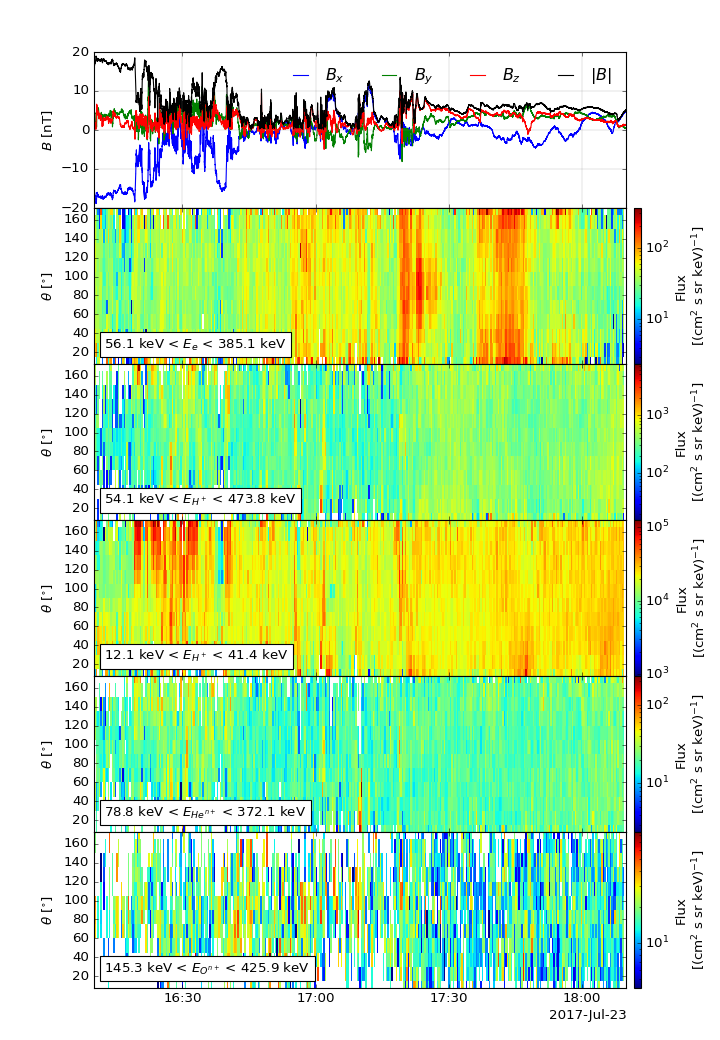

In [12]:
f, axs = plt.subplots(6, sharex="all", figsize=(9, 13))
f.subplots_adjust(bottom=.05, top=.95, left=.13, right=.87, hspace=0)

plot_line(axs[0], b_gse)
plot_line(axs[0], pyrf.norm(b_gse), color="k")
axs[0].legend(["$B_x$", "$B_y$", "$B_z$", "$|B|$"], frameon=False, handlelength=1.5, loc="upper right", ncol=4)
axs[0].set_ylabel("$B$ [nT]")
axs[0].set_ylim([-20, 20])

axs[1], caxs1 = plot_spectr(axs[1], dpf_een_pad_electron_spin.mean(dim="energy", skipna=True), 
                            cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_een_pad_electron.energy.data[[0, -1]])
axs[1].text(.02, .1, f"{e_min:3.1f} keV < $E_{{e}}$ < {e_max:3.1f} keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[1].transAxes)

axs[2], caxs2 = plot_spectr(axs[2], dpf_extof_pad_proton_spin.mean(dim="energy", skipna=True), 
                            cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_proton.energy.data[[0, -1]])
axs[2].text(.02, .1, f"{e_min:3.1f} keV < $E_{{H^+}}$ < {e_max:3.1f} keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[2].transAxes)

axs[3], caxs3 = plot_spectr(axs[3], dpf_phxtof_pad_proton_spin.mean(dim="energy", skipna=True), 
                            cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_phxtof_pad_proton.energy.data[[0, -1]])
axs[3].text(.02, .1, f"{e_min:3.1f} keV < $E_{{H^+}}$ < {e_max:3.1f} keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[3].transAxes)

axs[4], caxs4 = plot_spectr(axs[4], dpf_extof_pad_helium_spin.mean(dim="energy", skipna=True), 
                            cscale="log")
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_helium_spin.energy.data[[0, -1]])
axs[4].text(.02, .1, f"{e_min:3.1f} keV < $E_{{He^{{n+}}}}$ < {e_max:3.1f} keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[4].transAxes)

axs[5], caxs5 = plot_spectr(axs[5], dpf_extof_pad_oxygen_spin.mean(dim="energy", skipna=True), 
                            cscale="log")
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_oxygen_spin.energy.data[[0, -1]])
axs[5].text(.02, .1, f"{e_min:3.1f} keV < $E_{{O^{{n+}}}}$ < {e_max:3.1f} keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[5].transAxes)

    
f.align_ylabels(axs)